In this problem, I analyze blood donors lab results to try and predict whether someone has liver disease. I use four different logistic regression models and for each, I fit the model using the training set, discover the optimal regulariaztion parameter using 5-fold cross validation, deterimine coeffiecient strengths and see which get drawn to 0, determine the accuracy on the test set, and report the confusion matrix for the test set. 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV, lasso_path

In [97]:
train = pd.read_csv('./Q1train.csv')
test = pd.read_csv('./Q1test.csv')
display(train)
display(test)
display(train.iloc[:,:-1])
display(train.iloc[:,-1])

x_train = scale(train.to_numpy()[:,:-1])
y_train = train.to_numpy()[:,-1]

x_test = scale(test.to_numpy()[:,:-1])
y_test = test.to_numpy()[:,-1]

#print(x_train)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,59,39.8,49.4,25.4,21.4,24.7,7.50,3.69,86.0,18.7,71.9,0
1,52,39.3,63.6,20.7,25.3,4.4,8.26,5.35,84.0,18.9,64.4,0
2,51,39.0,66.0,29.6,185.0,19.0,2.00,3.60,58.3,399.5,79.4,1
3,49,39.7,77.3,20.2,19.0,8.8,7.26,4.98,84.0,74.5,65.4,0
4,64,35.1,72.5,27.2,30.5,20.8,7.99,6.47,91.0,36.2,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,36,53.0,66.4,40.8,23.2,7.5,8.73,5.81,75.0,36.1,77.3,0
246,76,29.2,48.9,25.2,27.2,8.3,4.52,2.79,127.0,18.3,58.1,0
247,60,42.2,48.8,41.0,34.8,3.6,9.60,5.60,98.0,71.4,71.6,0
248,44,47.3,43.9,16.2,19.3,4.7,10.02,5.85,100.0,14.9,71.2,0


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,43,39.4,61.8,55.0,32.5,7.1,11.94,7.84,64.0,153.5,75.6,0
1,58,46.8,79.3,38.0,24.1,4.7,9.51,5.07,99.0,22.9,72.4,0
2,57,47.0,29.7,10.2,55.9,12.0,6.60,4.64,70.9,69.6,80.9,1
3,52,42.3,72.6,47.4,23.8,6.0,8.62,7.20,86.0,36.1,77.6,0
4,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,50,46.6,66.3,19.5,23.7,18.5,8.27,5.73,92.0,12.1,76.7,0
115,53,49.2,71.8,42.8,29.4,6.8,15.10,6.24,107.0,48.3,77.8,0
116,42,44.1,46.8,23.8,19.4,7.0,10.83,6.28,95.0,19.7,73.0,0
117,32,41.0,34.4,12.1,60.9,6.0,13.80,5.48,45.4,33.1,71.1,1


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,59,39.8,49.4,25.4,21.4,24.7,7.50,3.69,86.0,18.7,71.9
1,52,39.3,63.6,20.7,25.3,4.4,8.26,5.35,84.0,18.9,64.4
2,51,39.0,66.0,29.6,185.0,19.0,2.00,3.60,58.3,399.5,79.4
3,49,39.7,77.3,20.2,19.0,8.8,7.26,4.98,84.0,74.5,65.4
4,64,35.1,72.5,27.2,30.5,20.8,7.99,6.47,91.0,36.2,68.7
...,...,...,...,...,...,...,...,...,...,...,...
245,36,53.0,66.4,40.8,23.2,7.5,8.73,5.81,75.0,36.1,77.3
246,76,29.2,48.9,25.2,27.2,8.3,4.52,2.79,127.0,18.3,58.1
247,60,42.2,48.8,41.0,34.8,3.6,9.60,5.60,98.0,71.4,71.6
248,44,47.3,43.9,16.2,19.3,4.7,10.02,5.85,100.0,14.9,71.2


0      0
1      0
2      1
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    1
Name: Category, Length: 250, dtype: int64

(250, 11) (250,) (119, 11) (119,)


# Logistic regression

Accuracy on test set = 0.9747899159663865
Coefficients = [[ -4.63795182  15.51467914 -39.76227664 -27.97597849  72.39664305
   15.30168863   2.73402449 -13.49102549  26.58767053  22.79400755
   -1.58036096]]


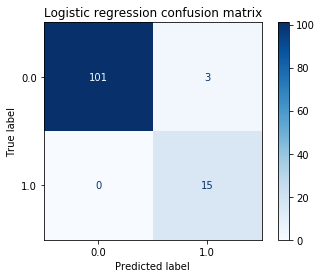

In [72]:
logit = LogisticRegression(penalty='none', random_state=42).fit(x_train, y_train)
preds = logit.predict(x_test)
acc =  logit.score(x_test, y_test)
print(f'Accuracy on test set = {acc}')
print(f'Coefficients = {logit.coef_}')
#conf_matrix = confusion_matrix(y_test, preds)
conf_matrix = plot_confusion_matrix(logit, x_test, y_test, cmap='Blues') 
plt.title('Logistic regression confusion matrix')
plt.show()

# Ridge Logistic regression

In [ ]:
# method 1     
'''for lam in np.arange(.01, .99, .05):
    kf = KFold(n_splits=5)
    cv_scores = []
    for train_idx, test_idx in kf.split(x_train):
        x_train_cv, x_test_cv = x_train[train_idx], x_train[test_idx]
        y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
        
        logit_ridge = LogisticRegression(C = 1/lam, penalty='l2', random_state=0).fit(x_train_cv, y_train_cv)
        preds = logit_ridge.predict(x_test_cv)
    
        acc =  logit_ridge.score(x_test_cv, y_test_cv)
        #cv_scores.append(((preds - y_test_cv)**2))
        cv_scores.append(acc)
        
    mse_scores.append(sum(cv_scores) / len(cv_scores))'''

Accuracy on test set = 0.9915966386554622
Coefficients = [[-0.44588393  0.57219133 -2.12338029 -1.89210139  3.346405    1.17927814
   0.24227654 -0.66393913  1.50222988  1.79434317 -0.17968884]]
Optimal lambda = 0.31


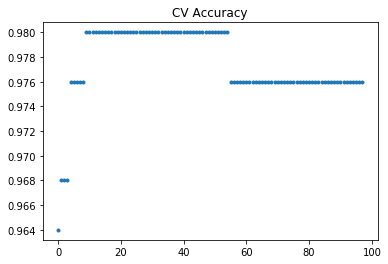

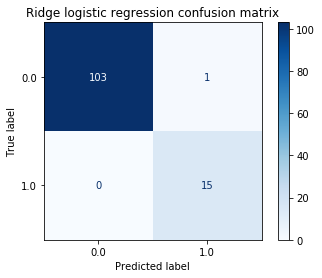

In [71]:
cv_scores = []

for lam in np.arange(.01, .99, .01):
    logit_ridge = LogisticRegression(C = 1/lam , penalty='l2', random_state=42)
    cv_scores.append(cross_val_score(logit_ridge, x_train, y_train, cv=5).mean())
    

plt.plot(cv_scores, '.')
plt.title('CV Accuracy')

lam_optimal = np.arange(.01, .99, .01)[30]
#print(lam_optimal)
logit_ridge = LogisticRegression(C = 1/lam_optimal , penalty='l2', random_state=42).fit(x_train, y_train)

 
preds = logit_ridge.predict(x_test)
acc =  logit_ridge.score(x_test, y_test)
print(f'Accuracy on test set = {acc}')
print(f'Coefficients = {logit_ridge.coef_}')
print(f'Optimal lambda = {lam_optimal}')
#conf_matrix = confusion_matrix(y_test, preds)
conf_matrix = plot_confusion_matrix(logit_ridge, x_test, y_test, cmap='Blues') 
plt.title('Ridge logistic regression confusion matrix')
plt.show()

# Lasso Logistic regression

Accuracy on test set = 0.9915966386554622
Coefficients = [[-0.36923805  0.41001575 -1.71097269 -1.6979815   3.67845333  0.47432237
   0.         -0.23197571  1.1734856   1.48368919  0.        ]]
Optimal lambda = 0.76


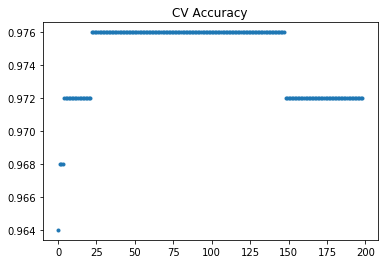

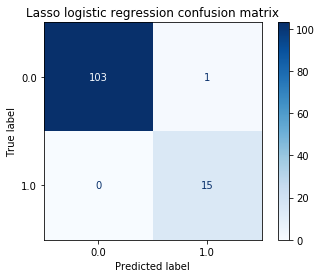

In [104]:
cv_scores = []

for lam in np.arange(.01, 2.0, .01):
    logit_lasso = LogisticRegression(C = 1/lam , penalty='l1', solver='liblinear', random_state=42)
    cv_scores.append(cross_val_score(logit_lasso, x_train, y_train, cv=5).mean())
    

plt.plot(cv_scores, '.')
plt.title('CV Accuracy')
lam_optimal = np.arange(.01, 2.0, .01)[75]
#print(lam_optimal)
logit_lasso = LogisticRegression(C = 1/lam_optimal , penalty='l1', solver='liblinear', random_state=42).fit(x_train, y_train)

 
preds = logit_lasso.predict(x_test)
acc =  logit_lasso.score(x_test, y_test)
print(f'Accuracy on test set = {acc}')
print(f'Coefficients = {logit_lasso.coef_}')
print(f'Optimal lambda = {lam_optimal}')
#conf_matrix = confusion_matrix(y_test, preds)
conf_matrix = plot_confusion_matrix(logit_lasso, x_test, y_test, cmap='Blues') 
plt.title('Lasso logistic regression confusion matrix')
plt.show()

# Adaptive lasso

Accuracy on test set = -0.21717298640019145
Coefficients = [ 0.04529298 -0.          0.08531111  0.02562507  0.01816135  0.03052256
 -0.00379446 -0.          0.02961249  0.04114065 -0.        ]
Optimal alpha = 0.004040932678489089


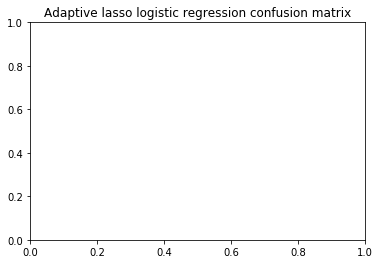

In [102]:
# adapted from exampe code
gamma = 1

ols_betas = LogisticRegression(penalty='none', random_state=0, fit_intercept=False).fit(x_train, y_train).coef_
w_ols = ols_betas**-gamma
w_ols = np.squeeze(w_ols)
#print(w_ols.shape)
X_ols = x_train/w_ols

# test
ols_betas_test = LogisticRegression(penalty='none', random_state=0, fit_intercept=False).fit(x_train, y_train).coef_
w_ols_test = ols_betas_test**-gamma
w_ols_test = np.squeeze(w_ols_test)
#print(w_ols.shape)
X_ols_test = x_test/w_ols_test


lambdas, lasso_betas, _ = lasso_path(X_ols, y_train)
#print(lambdas.shape, lasso_betas.shape)
#print(lasso_betas.shape, w_ols.shape)
lasso_betas = lasso_betas/w_ols[:, None]
lasso_coef = pd.DataFrame(index=lambdas, data=lasso_betas.T)
#display(lasso_coef)
lasso_coef.columns = [f'B{i}' for i in range(1, x_train.shape[1]+1)]
#display(lasso_coef)
#print(lasso_coef['B10'].to_list())
non_zero = lasso_coef.abs().mean() > 1e-1
lasso_coef = lasso_coef.loc[:, non_zero]
#print(lasso_coef)

logit_ad = LassoCV(alphas=lambdas, fit_intercept=False, cv=5).fit(X_ols, y_train) 

#print(logit_ad.alpha_)
#print(logit_ad.coef_)


preds = logit_ad.predict(X_ols_test)
preds = np.where(preds < 0, 0, preds)
preds = np.where(preds > 0, 1, preds)
acc =  logit_ad.score(x_test, y_test)
print(f'Accuracy on test set = {acc}')
print(f'Coefficients = {logit_ad.coef_}')
print(f'Optimal alpha = {logit_ad.alpha_}')
conf_matrix = confusion_matrix(y_test, preds)
plt.
#conf_matrix = plot_confusion_matrix(logit_ad, X_ols_test, y_test, cmap='Blues') 
plt.title('Adaptive lasso logistic regression confusion matrix')
plt.show()

In [103]:
preds

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])